
# DBSCAN & Hierarchical Clustering
## Practical Implementation Notebook

We will cover:
- Dataset creation
- Scaling and preprocessing
- DBSCAN clustering and interpretation
- Choosing `eps` using k-distance plot
- Hierarchical clustering with linkage methods
- Dendrogram analysis
- Practical comparison and guidance


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons, make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors

from scipy.cluster.hierarchy import dendrogram, linkage


## Dataset Creation

We start with a synthetic dataset so that cluster behavior is clearly visible.
The `make_moons` dataset is ideal because clusters are **non-spherical**.


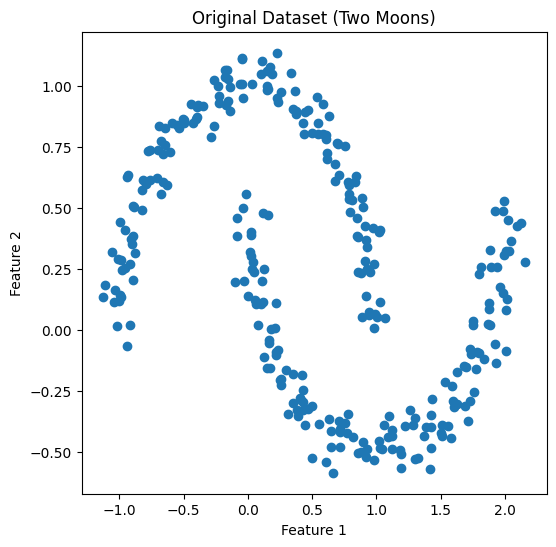

In [ ]:
X, y = make_moons(n_samples=300, noise=0.06, random_state=42)

plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1])
plt.title("Original Dataset (Two Moons)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


## 3. Why Scaling is Necessary

Both DBSCAN and Hierarchical Clustering rely on **distance calculations**.
If features are on different scales, distance values become misleading.

We apply Standard Scaling so that:
- Mean becomes 0
- Standard deviation becomes 1


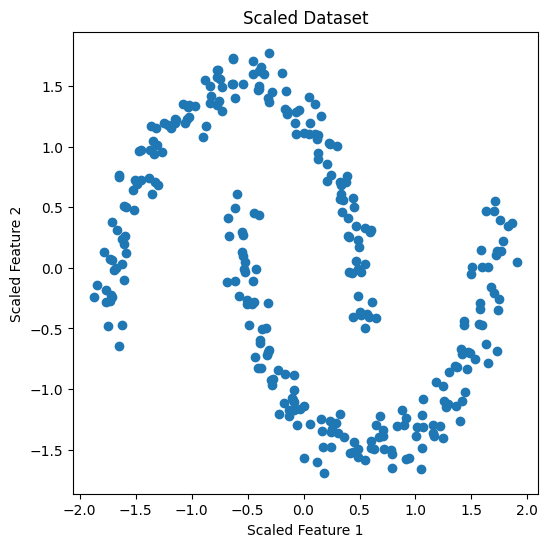

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

plt.figure(figsize=(6,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1])
plt.title("Scaled Dataset")
plt.xlabel("Scaled Feature 1")
plt.ylabel("Scaled Feature 2")
plt.show()


## DBSCAN Implementation

We now apply DBSCAN.
Important parameters:
- `eps`: neighborhood radius
- `min_samples`: minimum points required to form dense region


In [ ]:
#DBSCAN Implementation
dbscan = DBSCAN(eps=0.3, min_samples=5)

In [ ]:
db_labels = dbscan.fit_predict(X_scaled)

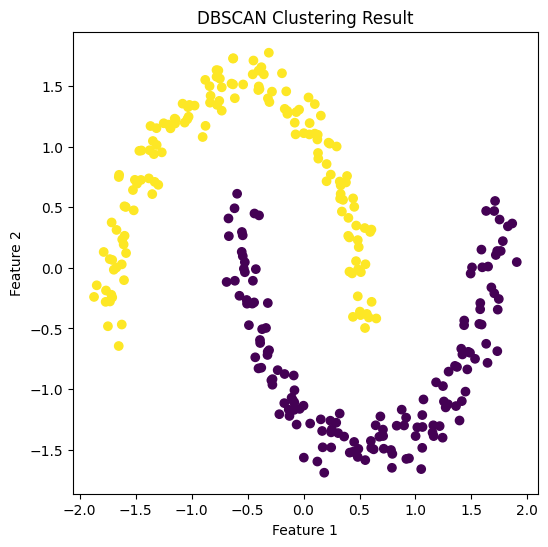

Unique cluster labels: [0 1]


In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c= db_labels, cmap="viridis")
plt.title("DBSCAN Clustering Result")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

print("Unique cluster labels:", np.unique(db_labels))


### Interpretation of DBSCAN Output

- Each color represents a cluster
- Label `-1` represents noise points
- DBSCAN automatically decides the number of clusters



## 5. Choosing eps using k-distance Plot

Choosing `eps` is critical.
We use the k-distance plot to identify a suitable value.


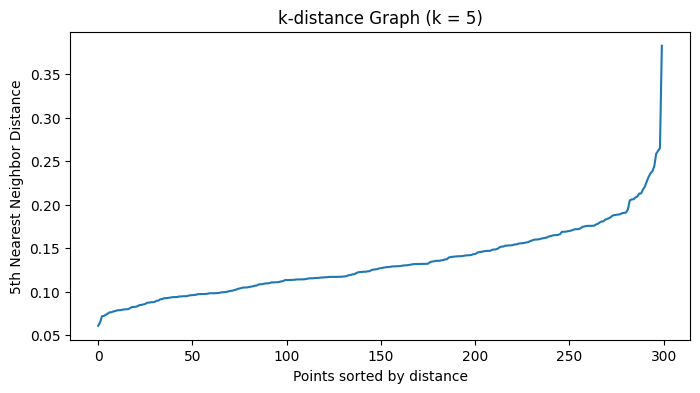

In [ ]:
#Choosing eps using k-distance Plot (Here we are searching for 5 samples best eps value)
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances[:,4])

plt.figure(figsize=(8,4))
plt.plot(distances)
plt.title("k-distance Graph (k = 5)")
plt.xlabel("Points sorted by distance")
plt.ylabel("5th Nearest Neighbor Distance")
plt.show()


### How to Read the k-distance Graph

- Look for a sharp change (elbow)
- The y-value at the elbow is a good choice for `eps`



## 6. Hierarchical Clustering Implementation

We now apply Agglomerative Hierarchical Clustering.
We start by choosing:
- Number of clusters
- Linkage method


In [10]:
#Hierarchical Clustering Implementation
hc = AgglomerativeClustering(n_clusters=6, linkage='ward')
hc_labels = hc.fit_predict(X_scaled)

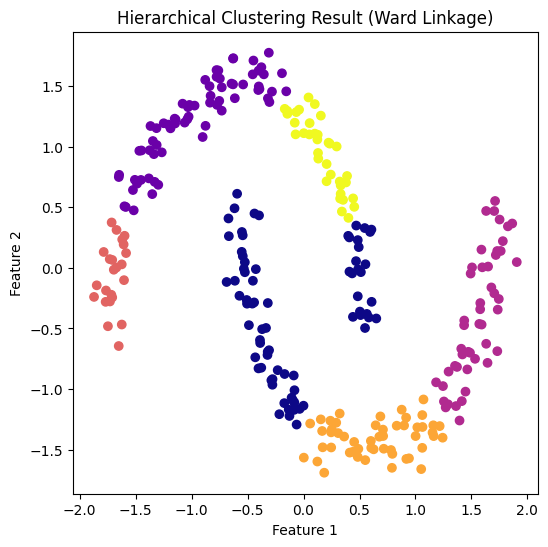

In [11]:
plt.figure(figsize=(6,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=hc_labels, cmap='plasma')
plt.title("Hierarchical Clustering Result (Ward Linkage)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


## 7. Dendrogram Construction

A dendrogram helps us understand **how clusters merge** and **where to cut**.


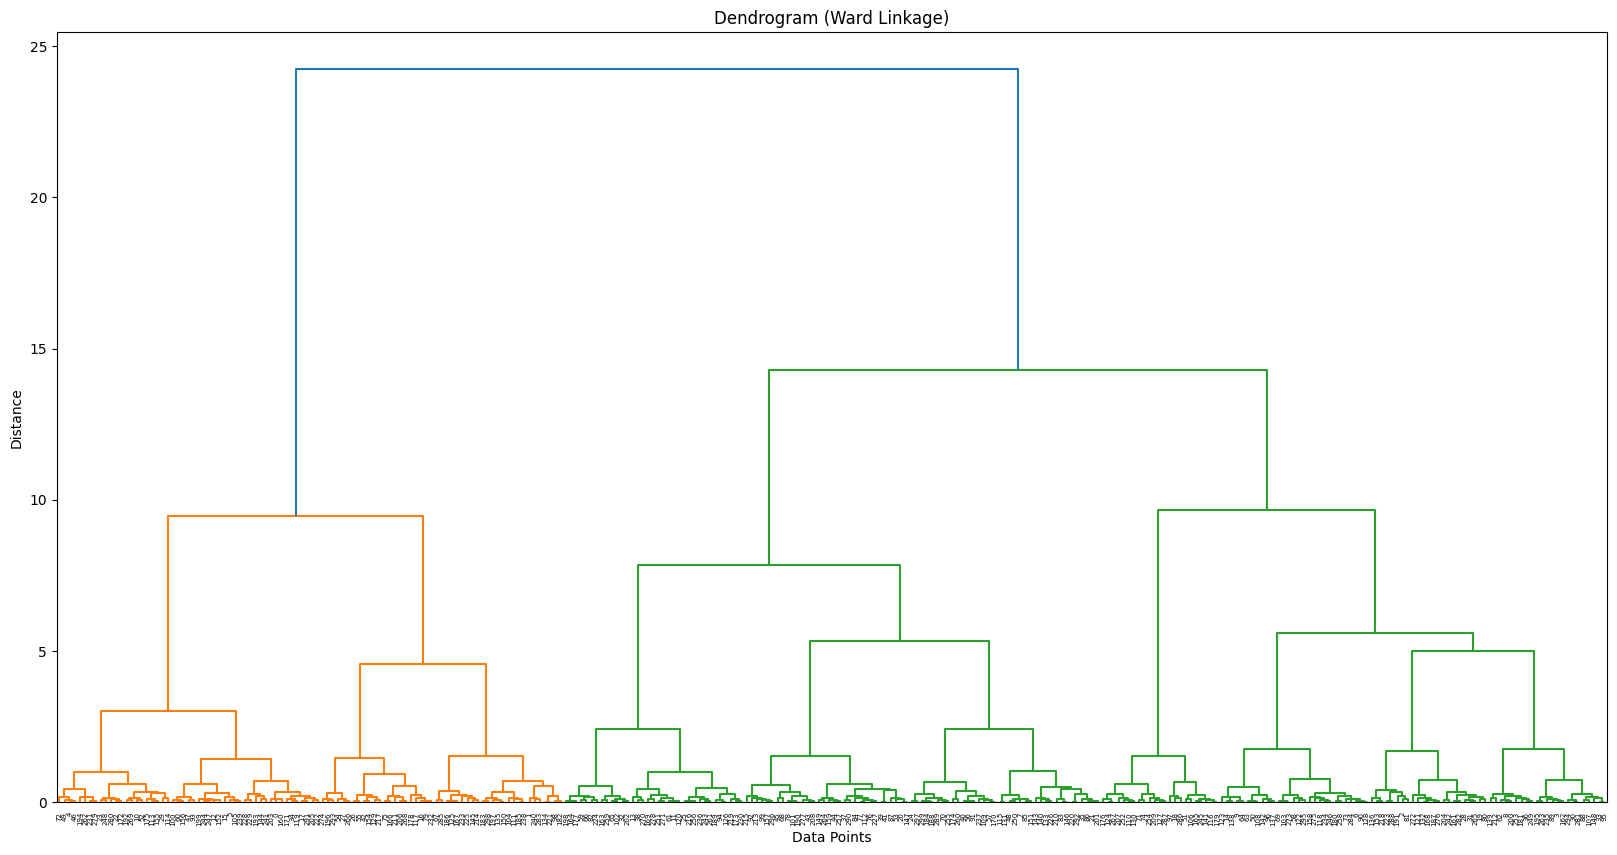

In [13]:
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(20,10))
dendrogram(linked)
plt.title("Dendrogram (Ward Linkage)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


### Interpreting the Dendrogram

- Height of merge indicates distance
- Horizontal cut decides cluster count
- Allows flexibility in cluster selection


class sklearn.cluster.AgglomerativeClustering(n_clusters=2, *, metric='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None, compute_distances=False)[source]


linkage{‘ward’, ‘complete’, ‘average’, ‘single’}, default=’ward’

Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.

* ‘ward’ minimizes the variance of the clusters being merged.

* ‘average’ uses the average of the distances of each observation of the two sets.

* ‘complete’ or ‘maximum’ linkage uses the maximum distances between all observations of the two sets.

* ‘single’ uses the minimum of the distances between all observations of the two sets.



## Comparison and Practical Guidance

### DBSCAN
- Best for noisy data
- Finds arbitrary shaped clusters
- No need to specify cluster count

### Hierarchical Clustering
- Best for interpretability
- Shows full structure
- Suitable for small to medium datasets



## Final Takeaway

Clustering is not about choosing the most popular algorithm.
It is about choosing the algorithm that best matches the structure of your data.

Understanding DBSCAN and Hierarchical Clustering equips you to handle real-world, messy datasets.
